# Entanglement generation and characterization using metamaterial resonators

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from numpy import *
from qutip import *
from IPython.display import Image
from numpy.linalg import *
import multiprocessing  
from multiprocessing import Pool, cpu_count
import scipy.constants as sc
import time
import datetime
import os
from matplotlib import cm
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['figure.dpi'] = 100

saveResults = True

## Model

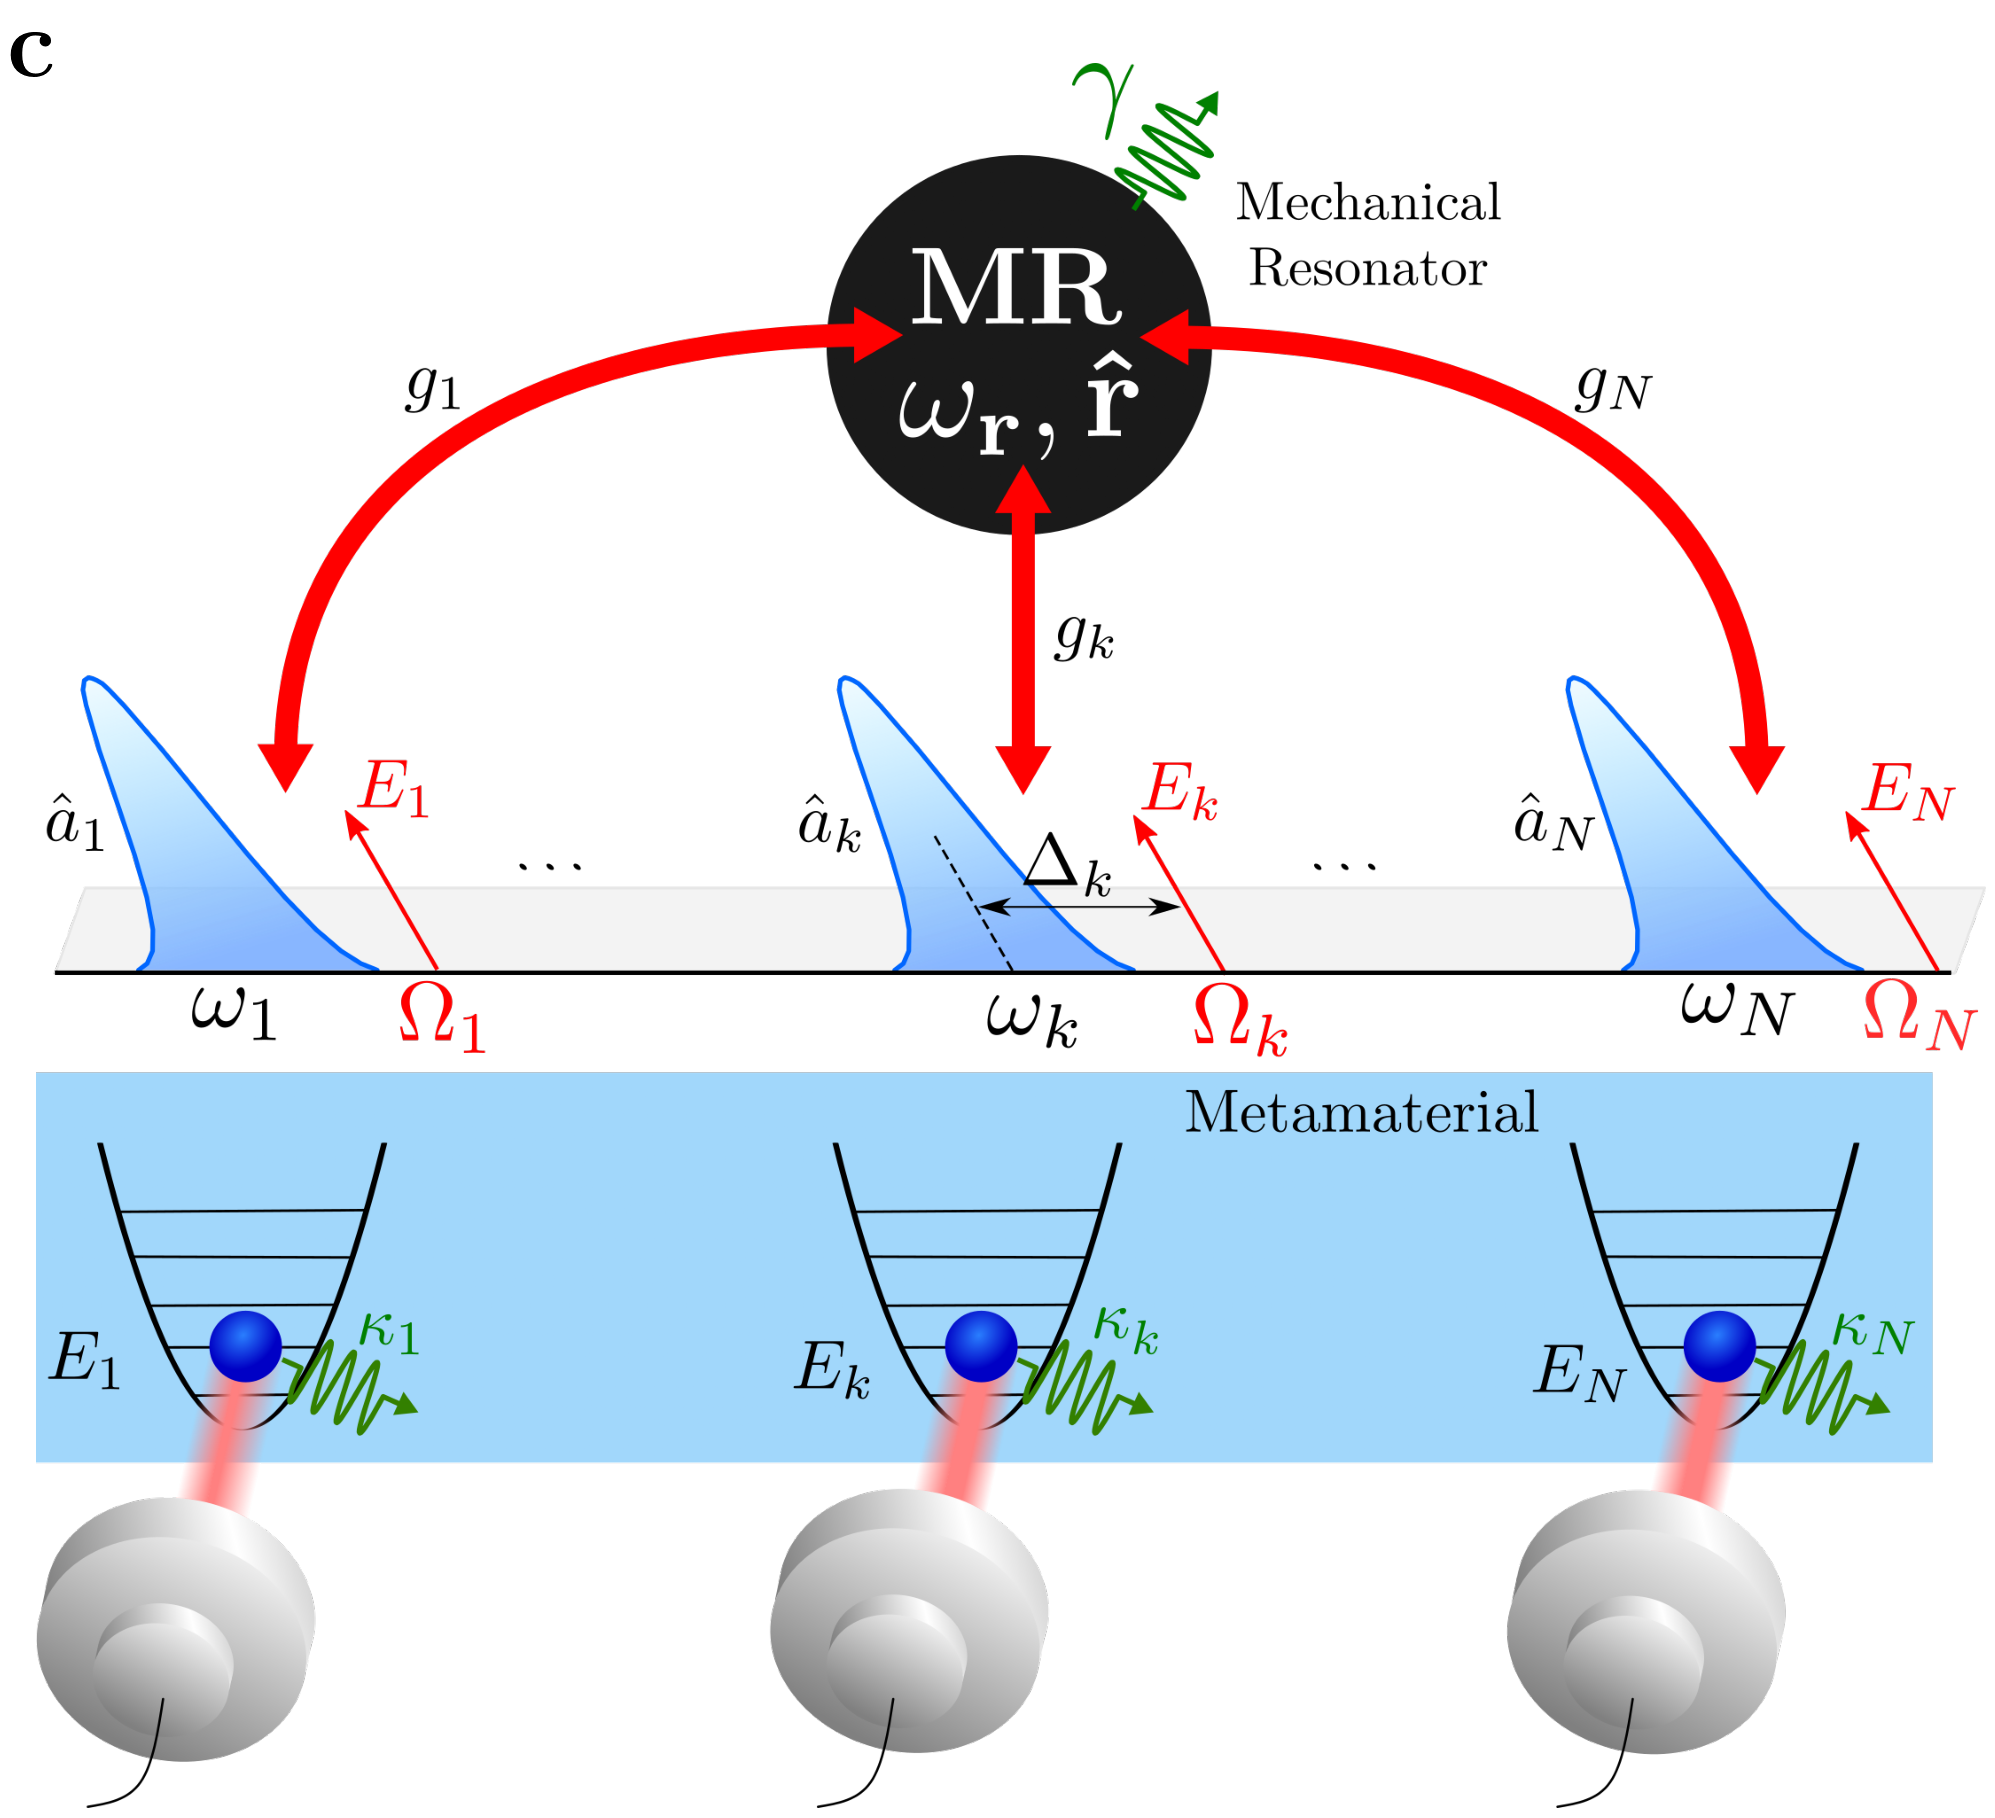

In [2]:
fig, axes[0] = plt.subplots(1, 1, figsize=(20, 20))

img3 = mpimg.imread(r'Images\Metamaterial_MR_system_schematic.png')

axes[0].text(-30, 15, r"$\mathbf{c}$", color='black', fontsize=70)

plt.axis('off')
plt.imshow(img3)
plt.tight_layout()
if(saveResults == True):
    plt.savefig(r'Results/fig03_Metamaterial_MR_system_schematic_pdf.pdf')
    plt.savefig(r'Results/fig03_Metamaterial_MR_system_schematic_png.png')
plt.show()

## Metamaterial Circuit Resonator

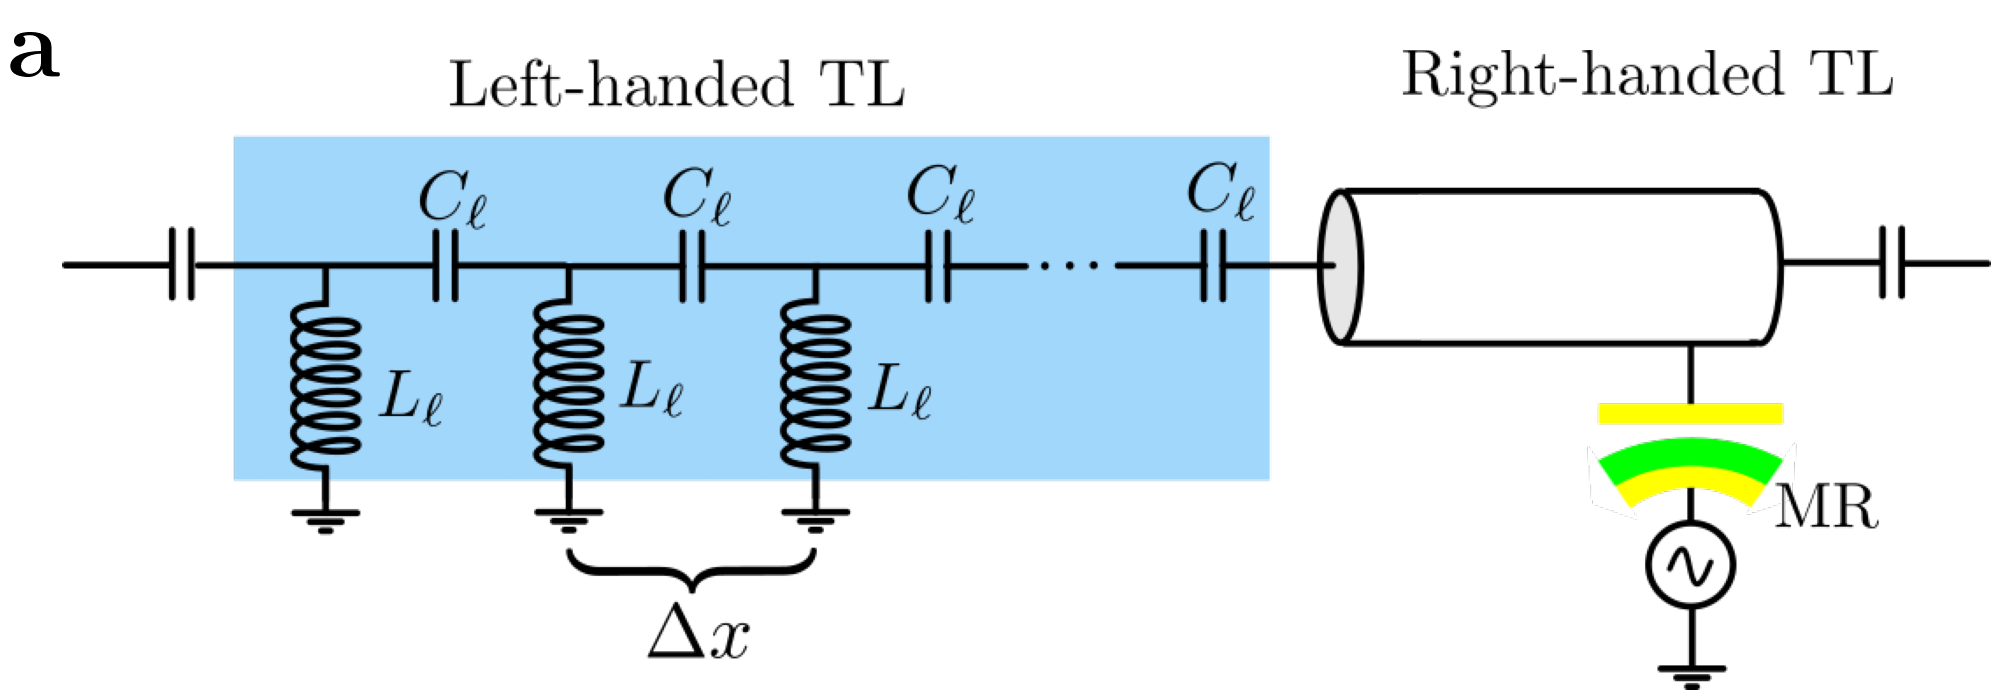

In [3]:
fig, axes[0] = plt.subplots(1, 1, figsize=(20, 20))

img1 = mpimg.imread(r'Images\CTL_MechanicResonator_circuit_model.png')

axes[0].text(-30, 15, r"$\mathbf{a}$", color='black', fontsize=70)

plt.axis('off')
plt.imshow(img1)
plt.tight_layout()
if(saveResults == True):
    plt.savefig(r'Results/fig01_CTL_MechanicResonator_circuit_model_pdf.pdf')
    plt.savefig(r'Results/fig01_CTL_MechanicResonator_circuit_model_png.png')
plt.show()

In [4]:
characteristic_Impedance = 50  # Ohm
infrared_cutoff = 2 * pi * 5 * 1e9  # 5 GHz

capacitance_per_cell = (1 / (2 * infrared_cutoff * characteristic_Impedance))
inductance_per_cell = (characteristic_Impedance / (2 * infrared_cutoff))

print('Capacitance (C) = %.3f fF/cell' % (capacitance_per_cell*1e15))
print('Inductance (L) = %.3f pH/cell' % (inductance_per_cell*1e12))

Capacitance (C) = 318.310 fF/cell
Inductance (L) = 795.775 pH/cell


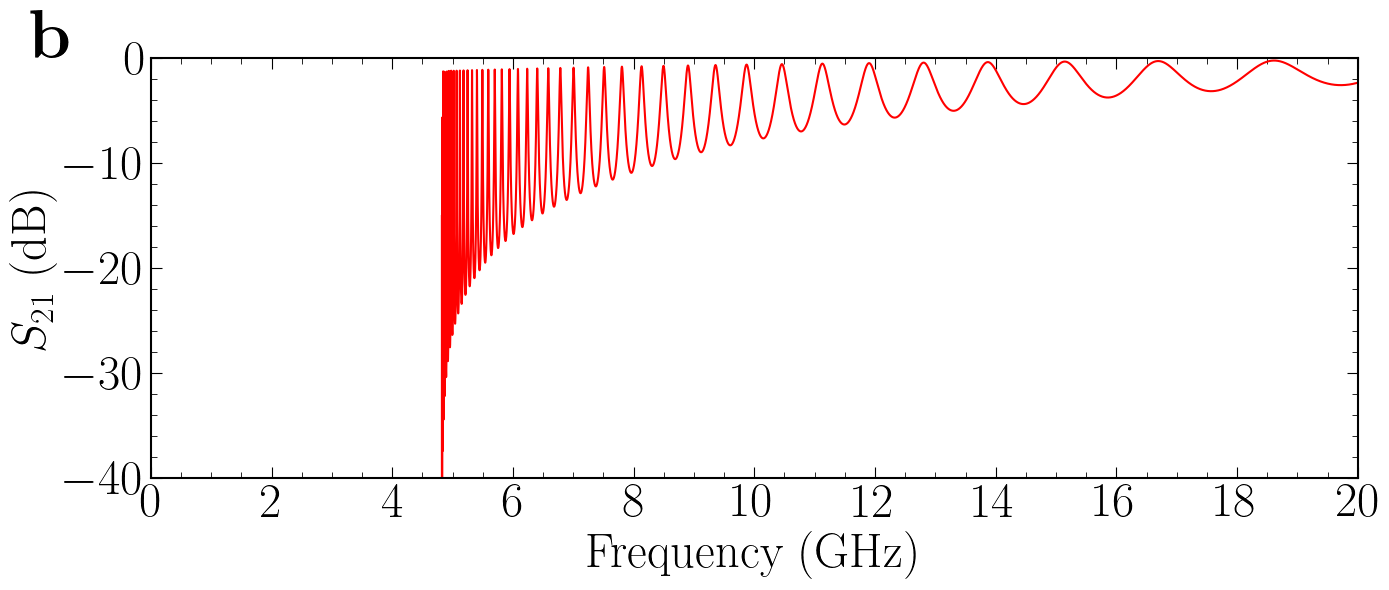

In [5]:
data_s21_artigo = loadtxt(r'Data/S21parameter_cutoff5GHz.txt')

x_list_s21artigo = data_s21_artigo[:,0]
y_list_s21artigo = data_s21_artigo[:,1]

fig, axes1 = plt.subplots(1, 1, figsize=(14, 6)) #14,7

axes1.plot(x_list_s21artigo, y_list_s21artigo, color='red', linestyle='-', label=r'Delta', lw=1.5)

axes1.set_xlabel(r'Frequency (GHz)', rotation=0, fontsize=35)
axes1.set_ylabel(
    r'$S_{21}$ (dB)', rotation=90, fontsize=35)

axes1.tick_params(axis='both', which='major', length = 8, direction='in', labelsize=35)
axes1.tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=35)
#axes1.yaxis.tick_right()
axes1.xaxis.set_ticks_position('both')
axes1.yaxis.set_ticks_position('both')
#axes1.legend(loc=2, fontsize=23, frameon=False)

#axes1.set_xlim(0, 5778.04)
axes1.set_ylim(-40, 0)
axes1.set_xlim(0, 20)

start, end = axes1.get_ylim()
axes1.xaxis.set_ticks(arange(0, 20+1, 2))
axes1.yaxis.set_ticks(arange(start, end+1, 10))

axes1.xaxis.set_minor_locator(AutoMinorLocator())
axes1.yaxis.set_minor_locator(AutoMinorLocator())

axes1.set_ylim(-40, 0)
axes1.set_xlim(0, 20)

axes1.text(-2, 0, r"$\mathbf{b}$", color='black', fontsize=50)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()

if( saveImages == True):
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.pdf')
plt.show()

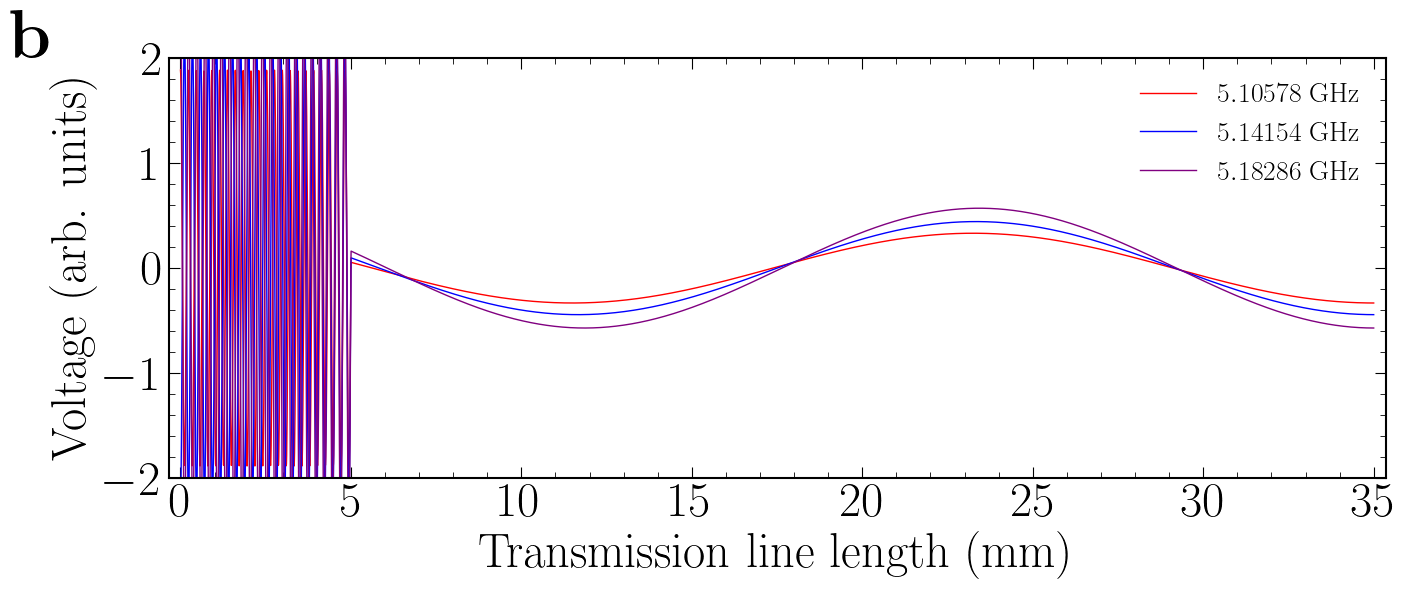

In [6]:
###############################
# Parameters from Mathematica calcultations
# Right-handed capacitance per unit of length = 0.1667 fF/um
# Right-handed inductance per unit of length = 0.4167 pH/um
# Left-handed capacitance = 318.310 fF
# Left-handed inductance  = 795.775 pH
# Number of unit cells = 50
# Unit cell length = Delta x = 100 um
# Right-handed TL length = 30 mm 
###############################

data_voltageMode1_fromMathematica = loadtxt(r'Data\data1_freq5105779.txt')
data_voltageMode2_fromMathematica = loadtxt(r'Data\data2_freq5141539.txt')
data_voltageMode3_fromMathematica = loadtxt(r'Data\data3_freq5182859.txt')

x1_list_length = data_voltageMode1_fromMathematica[:,0]*1000 + 5
y1_list_voltage = data_voltageMode1_fromMathematica[:,1]

x2_list_length = data_voltageMode2_fromMathematica[:,0]*1000  + 5
y2_list_voltage = data_voltageMode2_fromMathematica[:,1]

x3_list_length = data_voltageMode3_fromMathematica[:,0]*1000 + 5
y3_list_voltage = data_voltageMode3_fromMathematica[:,1]

fig, axes2 = plt.subplots(1, 1, figsize=(14, 6)) #14,7

axes2.plot(x1_list_length, y1_list_voltage, color='red', linestyle='-', label=r'$5.10578$ GHz', lw=1.)
axes2.plot(x2_list_length, y2_list_voltage, color='blue', linestyle='-', label=r'$5.14154$ GHz', lw=1.)
axes2.plot(x3_list_length, y3_list_voltage, color='purple', linestyle='-', label=r'$5.18286$ GHz', lw=1.)

axes2.set_xlabel(r'Transmission line length (mm)', rotation=0, fontsize=35)
axes2.set_ylabel(r'Voltage (arb. units)', rotation=90, fontsize=35)

axes2.tick_params(axis='both', which='major', length = 8, direction='in', labelsize=35)
axes2.tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=35)
#axes2.yaxis.tick_right()
axes2.xaxis.set_ticks_position('both')
axes2.yaxis.set_ticks_position('both')
#axes2.legend(loc=2, fontsize=23, frameon=False)

#axes2.set_xlim(0, 5778.04)
#axes2.set_ylim(-40, 0)
axes2.set_ylim(-2, 2)

#start, end = axes2.get_ylim()
axes2.xaxis.set_ticks(arange(0, 35+1, 5))
#axes2.yaxis.set_ticks(arange(start, end+1, 10))

axes2.xaxis.set_minor_locator(AutoMinorLocator())
axes2.yaxis.set_minor_locator(AutoMinorLocator())

#axes2.set_ylim(-40, 0)
#axes2.set_xlim(0, 20)

axes2.text(-5, 2, r"$\mathbf{b}$", color='black', fontsize=50)
#axes2.text(-5, -1.5, r"Right-handed", color='black', fontsize=30)
#axes2.text(10, -1.5, r"Left-handed", color='black', fontsize=30)


axes2.legend(loc=1,fontsize=20,frameon=False)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()



if( saveImages == True):
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.pdf')
plt.show()

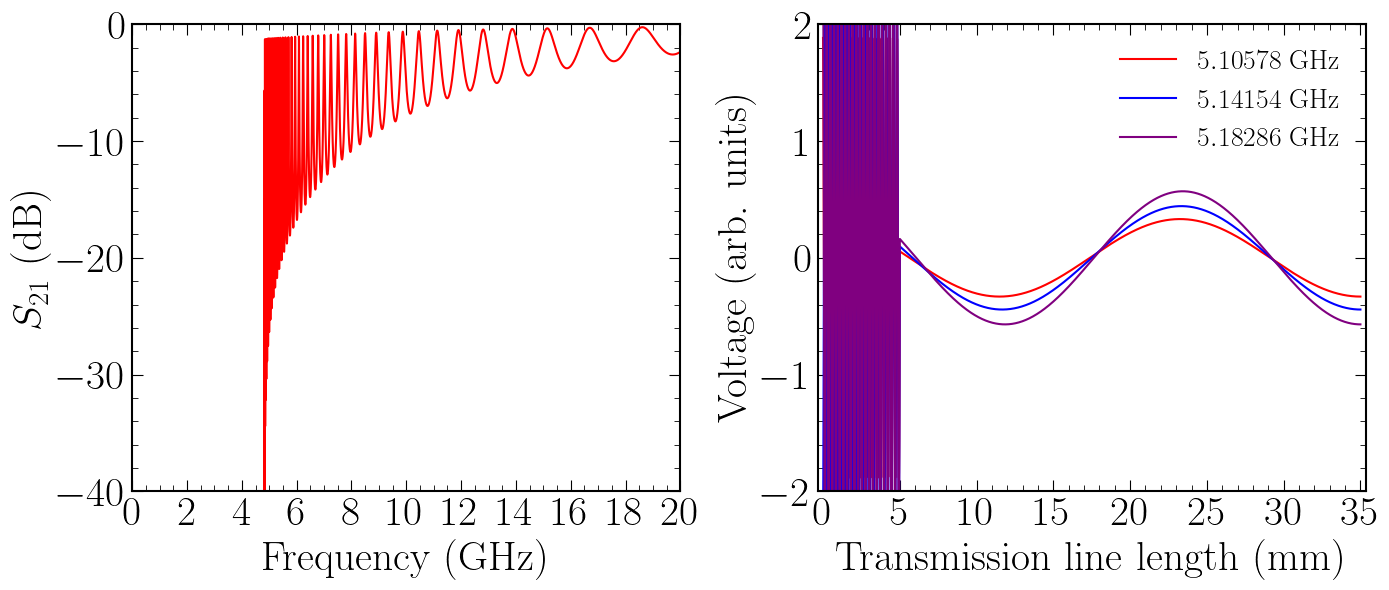

In [7]:
fig, axes[0] = plt.subplots(1, 2, figsize=(14, 6)) 

axes[0][0].plot(x_list_s21artigo, y_list_s21artigo, color='red', linestyle='-', label=r'Delta', lw=1.5)

axes[0][0].set_xlabel(r'Frequency (GHz)', rotation=0, fontsize=30)
axes[0][0].set_ylabel(
    r'$S_{21}$ (dB)', rotation=90, fontsize=30)

axes[0][0].tick_params(axis='both', which='major', length = 8, direction='in', labelsize=30)
axes[0][0].tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=30)
#axes[0].yaxis.tick_right()
axes[0][0].xaxis.set_ticks_position('both')
axes[0][0].yaxis.set_ticks_position('both')
#axes[0].legend(loc=2, fontsize=23, frameon=False)

#axes[0].set_xlim(0, 5778.04)
axes[0][0].set_ylim(-40, 0)
axes[0][0].set_xlim(0, 20)

start, end = axes[0][0].get_ylim()
axes[0][0].xaxis.set_ticks(arange(0, 20+1, 2))
axes[0][0].yaxis.set_ticks(arange(start, end+1, 10))

axes[0][0].xaxis.set_minor_locator(AutoMinorLocator())
axes[0][0].yaxis.set_minor_locator(AutoMinorLocator())

axes[0][0].set_ylim(-40, 0)
axes[0][0].set_xlim(0, 20)

#axes[0].text(-2, 0, r"$\mathbf{b}$", color='black', fontsize=50)

axes[0][1].plot(x1_list_length, y1_list_voltage, color='red', linestyle='-', label=r'$5.10578$ GHz', lw=1.5)
axes[0][1].plot(x2_list_length, y2_list_voltage, color='blue', linestyle='-', label=r'$5.14154$ GHz', lw=1.5)
axes[0][1].plot(x3_list_length, y3_list_voltage, color='purple', linestyle='-', label=r'$5.18286$ GHz', lw=1.5)

axes[0][1].set_xlabel(r'Transmission line length (mm)', rotation=0, fontsize=30)
axes[0][1].set_ylabel(r'Voltage (arb. units)', rotation=90, fontsize=30)

axes[0][1].tick_params(axis='both', which='major', length = 8, direction='in', labelsize=30)
axes[0][1].tick_params(axis='both', which='minor', length = 4, direction='in', labelsize=30)
#axes[1].yaxis.tick_right()
axes[0][1].xaxis.set_ticks_position('both')
axes[0][1].yaxis.set_ticks_position('both')
#axes[1].legend(loc=2, fontsize=23, frameon=False)

#axes[1].set_xlim(0, 5778.04)
#axes[1].set_ylim(-40, 0)
axes[0][1].set_ylim(-2, 2)

#start, end = axes[1].get_ylim()
axes[0][1].xaxis.set_ticks(arange(0, 35+1, 5))
#axes[1].yaxis.set_ticks(arange(start, end+1, 10))

axes[0][1].xaxis.set_minor_locator(AutoMinorLocator())
axes[0][1].yaxis.set_minor_locator(AutoMinorLocator())

#axes[1].set_ylim(-40, 0)
#axes[1].set_xlim(0, 20)

#axes[1].text(-10, 2, r"$\mathbf{b}$", color='black', fontsize=50)
#axes[1].text(-5, -1.5, r"Right-handed", color='black', fontsize=30)
#axes[1].text(10, -1.5, r"Left-handed", color='black', fontsize=30)


axes[0][1].legend(loc=1,fontsize=20,frameon=False)

plt.margins(x=0.01, y=0.01)
plt.tight_layout()

if( saveImages == True):
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.png')
    plt.savefig(r'Results/fig02_S21_simulacaoCST_artigo.pdf')
plt.show()

## Temperature and Dimension Test

In [8]:
w_test1 = 2 * pi * 10 * 1e6   # Test frequency = 10 MHz
w_test2 = 2 * pi * 20 * 1e6   # Test frequency = 20 MHz
w_test3 = 2 * pi * 50 * 1e6   # Test frequency = 50 MHz
w_test4 = 2 * pi * 100 * 1e6  # Test frequency = 100 MHz

w_test5 = 2 * pi * 1 * 1e9  # Test frequency = 1 GHz
w_test6 = 2 * pi * 5 * 1e9  # Test frequency = 5 GHz

test_frequencies = [w_test1, w_test2, w_test3, w_test4, w_test5, w_test6]

test_temperatures = linspace(0.001, 0.1, 200) 
test_dimensions = arange(3,16,1)                        

list_exc0_temp_vs_dim_freq = []
list_exc1_temp_vs_dim_freq = []
list_exc2_temp_vs_dim_freq = []
list_exc3_temp_vs_dim_freq = []
list_exc4_temp_vs_dim_freq = []

for k in test_frequencies:
    list_exc0_temp_vs_dim = []
    list_exc1_temp_vs_dim = []
    list_exc2_temp_vs_dim = []
    list_exc3_temp_vs_dim = []
    list_exc4_temp_vs_dim = []
    for i in test_temperatures:
        list_exc0_dim = []
        list_exc1_dim = []
        list_exc2_dim = []
        list_exc3_dim = []
        list_exc4_dim = [] 
        for l in test_dimensions:
            w_th = (sc.k*i)/(sc.hbar)
            n_th = n_thermal(k, w_th)
            list_exc0_dim.append(real(thermal_dm(l, n_th)[0,0]))
            list_exc1_dim.append(real(thermal_dm(l, n_th)[1,1]))
            list_exc2_dim.append(real(thermal_dm(l, n_th)[2,2]))
            if l > 3:
                list_exc3_dim.append(real(thermal_dm(l, n_th)[3,3]))
                if l > 4:
                    list_exc4_dim.append(real(thermal_dm(l, n_th)[4,4]))
                else:
                    list_exc4_dim.append(0)
            else:
                list_exc3_dim.append(0)
                list_exc4_dim.append(0)

        list_exc0_temp_vs_dim.append(list_exc0_dim)
        list_exc1_temp_vs_dim.append(list_exc1_dim)
        list_exc2_temp_vs_dim.append(list_exc2_dim)
        list_exc3_temp_vs_dim.append(list_exc3_dim)
        list_exc4_temp_vs_dim.append(list_exc4_dim)
    list_exc0_temp_vs_dim_freq.append(list_exc0_temp_vs_dim)
    list_exc1_temp_vs_dim_freq.append(list_exc1_temp_vs_dim)
    list_exc2_temp_vs_dim_freq.append(list_exc2_temp_vs_dim)
    list_exc3_temp_vs_dim_freq.append(list_exc3_temp_vs_dim)
    list_exc4_temp_vs_dim_freq.append(list_exc4_temp_vs_dim)

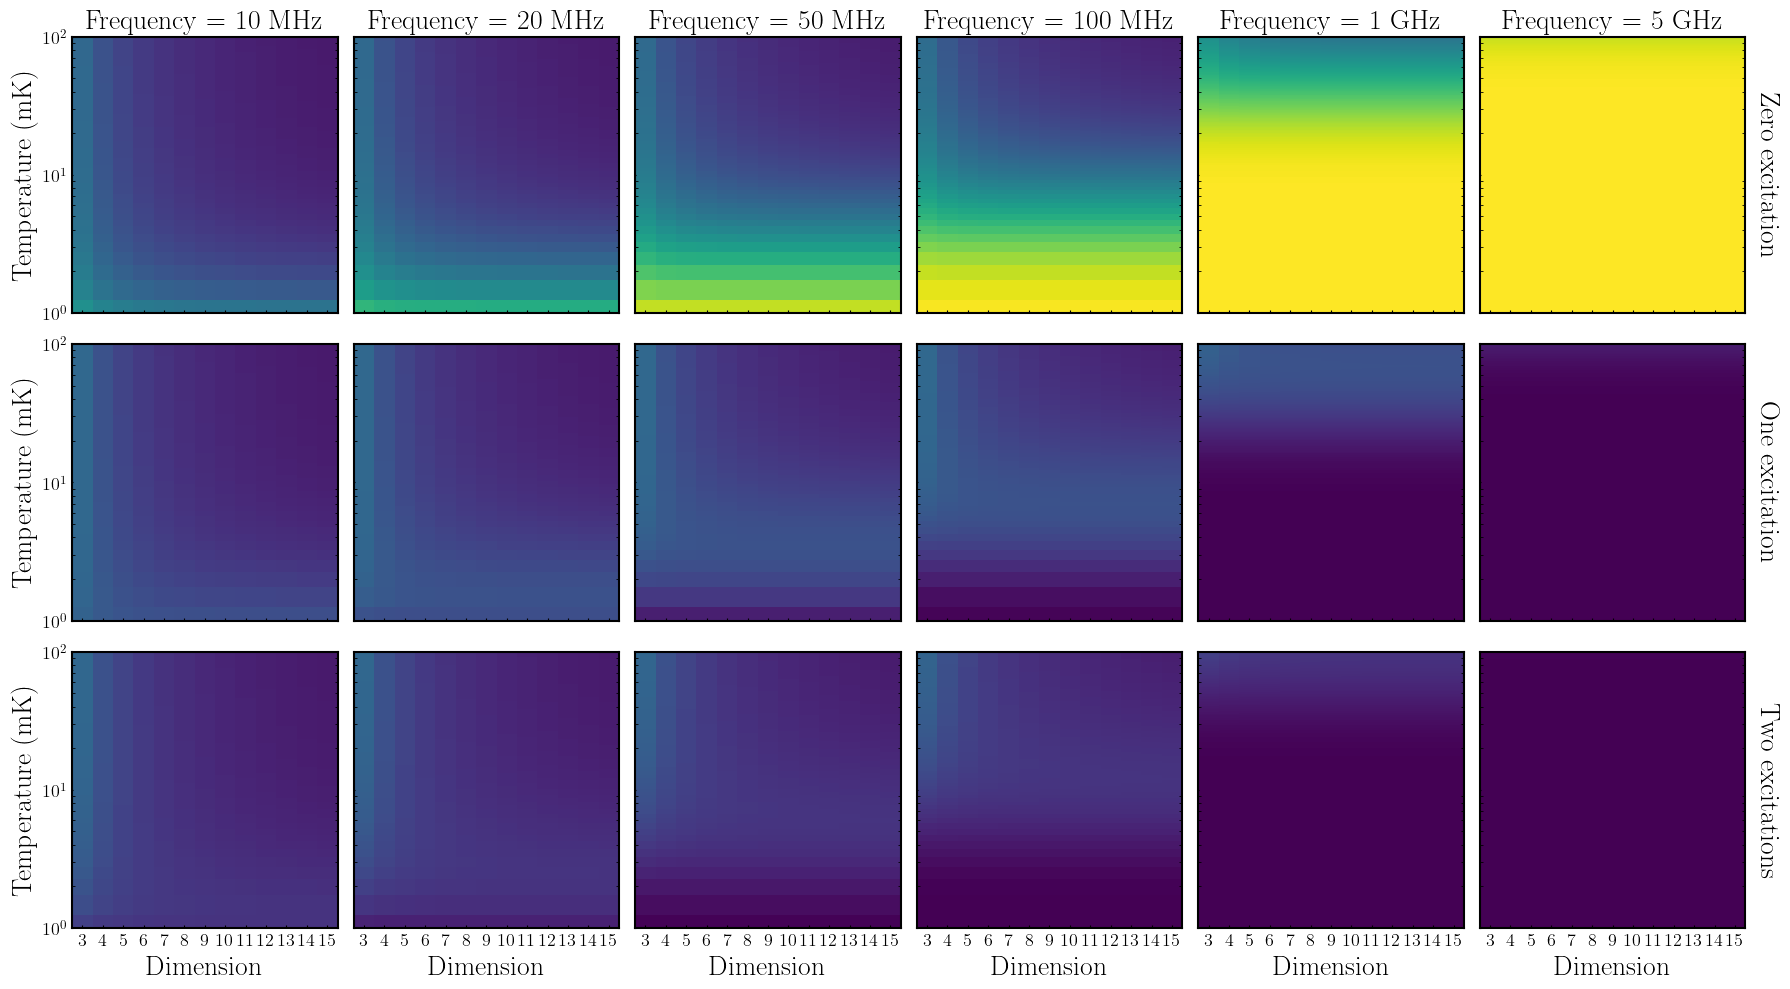

In [9]:
fig, axes[0] = plt.subplots(3, 6, figsize=(18, 10),sharey=True,sharex=True)

Lsize = 20

nrm = mpl.colors.Normalize(0, 1)

########################
# Use 'norm = nrm' below to normalize the probability colormap from 0 to 1. Otherwise, 
# use 'norm = nrm1' (or 'norm = nrm2' or 'norm = nrm3', depending on the excitation) to
# normalize the colomap according to the local maximum.
########################

for k in range(0,len(test_frequencies)):
    nrm1 = mpl.colors.Normalize(0, max(list_exc0_temp_vs_dim_freq[k][0]))
    axes[0][0,k].pcolormesh(test_dimensions, test_temperatures*1000, list_exc0_temp_vs_dim_freq[k], cmap=cm.viridis, norm=nrm, shading='auto')
    axes[0][0,0].set_ylabel(r'Temperature (mK)', rotation=90, fontsize=Lsize)
    axes[0][0,5].yaxis.set_label_position("right")
    axes[0][0,5].set_ylabel(r'Zero excitation', labelpad = 25, rotation=270, fontsize=Lsize)
    axes[0][0,k].tick_params(axis='both', which='major', direction='in', labelsize=13)
    axes[0][0,k].tick_params(axis='both', which='minor', direction='in', labelsize=13)
    axes[0][0,k].xaxis.set_ticks(arange(3, 16, 1))
    axes[0][0,k].yaxis.set_ticks_position('both')
    axes[0][0,k].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[0][0,k].xaxis.set_tick_params(length=2)
    axes[0][0,k].yaxis.set_tick_params(length=1)
    axes[0][0,k].set_ylim(1,100)

    nrm2 = mpl.colors.Normalize(0, max(list_exc1_temp_vs_dim_freq[k][-1]))
    axes[0][1,k].pcolormesh(test_dimensions, test_temperatures*1000, list_exc1_temp_vs_dim_freq[k], cmap=cm.viridis, norm=nrm, shading='auto')
    axes[0][1,0].set_ylabel(r'Temperature (mK)', rotation=90, fontsize=Lsize)
    axes[0][1,5].yaxis.set_label_position("right")
    axes[0][1,5].set_ylabel(r'One excitation', labelpad = 25, rotation=270, fontsize=Lsize)
    axes[0][1,k].tick_params(axis='both', which='major', direction='in', labelsize=13)
    axes[0][1,k].tick_params(axis='both', which='minor', direction='in', labelsize=13)
    axes[0][1,k].xaxis.set_ticks(arange(3, 16, 1))
    axes[0][1,k].yaxis.set_ticks_position('both')
    axes[0][1,k].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[0][1,k].xaxis.set_tick_params(length=2)
    axes[0][1,k].yaxis.set_tick_params(length=1)
    axes[0][1,k].set_yscale('log')
    axes[0][1,k].set_ylim(1,100)

    nrm3 = mpl.colors.Normalize(0, max(list_exc2_temp_vs_dim_freq[k][-1]))
    axes[0][2,k].pcolormesh(test_dimensions, test_temperatures*1000, list_exc2_temp_vs_dim_freq[k], cmap=cm.viridis, norm=nrm, shading='auto')
    axes[0][2,k].set_xlabel(r'Dimension', rotation=0, fontsize=Lsize)
    axes[0][2,0].set_ylabel(r'Temperature (mK)', rotation=90, fontsize=Lsize)
    axes[0][2,5].yaxis.set_label_position("right")
    axes[0][2,5].set_ylabel(r'Two excitations', labelpad = 25, rotation=270, fontsize=Lsize)
    axes[0][2,k].tick_params(axis='both', which='major', direction='in', labelsize=13)
    axes[0][2,k].tick_params(axis='both', which='minor', direction='in', labelsize=13)
    axes[0][2,k].xaxis.set_ticks(arange(3, 16, 1))
    axes[0][2,k].yaxis.set_ticks_position('both')
    axes[0][2,k].yaxis.set_minor_locator(AutoMinorLocator(2))
    axes[0][2,k].xaxis.set_tick_params(length=2)
    axes[0][2,k].yaxis.set_tick_params(length=1)
    axes[0][2,k].set_yscale('log')
    axes[0][2,k].set_ylim(1,100)
    
axes[0][0,0].set_title(r'Frequency = 10 MHz', fontsize=Lsize)
axes[0][0,1].set_title(r'Frequency = 20 MHz', fontsize=Lsize)
axes[0][0,2].set_title(r'Frequency = 50 MHz', fontsize=Lsize)
axes[0][0,3].set_title(r'Frequency = 100 MHz', fontsize=Lsize)
axes[0][0,4].set_title(r'Frequency = 1 GHz', fontsize=Lsize)
axes[0][0,5].set_title(r'Frequency = 5 GHz', fontsize=Lsize)

plt.tight_layout()
plt.show()


## Simulations

 - **Simulation 1:** In this simulation, we consider a small Fock space dimension, N = 3, for the three oscillators. As mentioned previously, we consider a very low temperature to avoid the thermal exciting of the higher energy motion states of the mechanical oscillator, which in this simulation has a mechanical frequency of 20 MHz. The coupling strength (with mode A) will vary from 0 to 15 MHz which is close the mechanical frequency to test the range of validity of our aproximation.

 - **Simulation 2:** In this simulation, we consider the same dimension for the Fock space, N = 3, but now with a higher mechanical frequency of 50 MHz. The coupling strength will vary from 0 15 MHz.

 - **Simulation 3:** In this simulation, we consider the same dimension for the Fock space, N = 3, but now with a even higher mechanical frequency of 100 MHz. The coupling strength will vary from 0 15 MHz.

 - **Simulation 4:** The objetive of this simulation is to investigate the effects of the dimension of the Fock space considered. For that, we will repeat simulation 3, but now for the higher Fock space dimension N = 4. The coupling strength will vary from 0 to 15 MHz. Long simulation.

 - **Simulation 5:** Same as previous but this time for Fock space dimension N = 5. The coupling strength will vary from 0 to 30 MHz. Very long simulation.

 - **Simulation 6:** This simulation will investigate thee effects of the external field amplitude so we will be varying the E_a isntead of the coupling stength (which will be fixed at 5 MHz), from 0 to 1 MHz which consists of 10 times bigger than the dissipation rates. This will be done for N = 4 and low temperature.

 - **Simulation 7:** In this simulation we will investigate the effects of the detuning on both oscillators. We will se the field amplitude to two times the dissipation rate, coupling strength to 5 MHz and Fock space dimension N = 4.

 - **Simulation 8:** For completion sake we will also atempt simulation 3 for higher temperature around (10mK) which is closer to the operating temperature inside a dilution refrigerator. This will require a higher dimension for the mechanical oscialltor. We will consider N = 3 for both oscillators and N = 7



### Simulation 1

In [2]:
# Coupling strength
g_size = 100             
g_start = 0       # 0 MHz      
g_final = 12      # 15 MHz
galist = 2 * pi * linspace(g_start, g_final, g_size) * 1e6
gb = 2 * pi * 5 * 1e6        # Fixed at 5 MHz

# Oscillators frequencies
wa = 2 * pi * 5.14154 * 1e9  # Second mode with freq = 5.14154 GHz
wb = 2 * pi * 5.18286 * 1e9  # Third mode with freq = 5.18286 GHz
wr = 2 * pi * 20 * 1e6       # Single mechanical mode with freq = 20 MHz

# Drive frequencies
ohm_a_initial = wa - 2 * pi * 6 * 1e6      # Set to start before the first red sideband
#ohm_a_1 = wa -  2 * pi * 10 * 1e6   # Left-most part of the center of the graphic
#ohm_a_2 = wa + 2 * pi * 2 * 1e6     # Right-most part of the center of the graphic
#ohm_a_3 = wa + 0.80 * wr            # Start of the blue sideband transitions
#ohm_a_4 = wa + 1.05 * wr            # End of the blud sideband transitions
ohm_a_final = wa + 2 * pi * 2 * 1e6         # Set to end after the blue sideband

#ohm_a_list_1 = linspace(ohm_a_initial, ohm_a_1, 100)
#ohm_a_list_2 = linspace(ohm_a_1, ohm_a_2, 300)
#ohm_a_list_3 = linspace(ohm_a_2, ohm_a_3, 100)
#ohm_a_list_4 = linspace(ohm_a_3, ohm_a_4, 100)
#ohm_a_list_5 = linspace(ohm_a_4, ohm_a_final, 50)

#omega_a_list = concatenate((ohm_a_list_1,
#                            ohm_a_list_2, 
#                            ohm_a_list_3, 
#                            ohm_a_list_4,
#                            ohm_a_list_5))   # Concatenating the different lists for Omega_a

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 300)

# Drive field amplitudes
E_a = 2 * pi * 40 * 1e3     # 40 kHz
E_b = 2 * pi * 40 * 1e3     # 40 kHz

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 80 kHz
kappa_b = 2 * pi * 80 * 1e3   # 80 kHz

gamma = 10 * kappa_a          # 0.8 MHz

T = 0.001                              # Temperature (2 mK)
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Fock dimension
N = 3

In [3]:
from Solver import Solver_TwoModesCoupledToMR


if __name__ == '__main__':
    pool = Pool(60)
    procs = galist
    aresults = [pool.apply_async(Solver_TwoModesCoupledToMR, args=(N,
                                                                  wa,
                                                                  wb,
                                                                  wr,
                                                                  kappa_a,
                                                                  kappa_b,
                                                                  gamma,
                                                                  n_th_r,
                                                                  E_a,
                                                                  E_b,
                                                                  proc,
                                                                  ohm_a_list)) for proc in procs]
    
    pool.close()
    pool.join()
        
    results = [ar.get() for ar in aresults]

##################

name = "Simulation_1"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

save_path_1 = "Results/" + name + "/"
if(saveResults == True):
    try:
        os.mkdir("Results/" + name)
    except OSError:
        print ("Creation of the directory %s failed. Directory may already exist." % save_path_1)


Creation of the directory Results/Simulation_1/ failed. Directory may already exist.


In [4]:
x_list = [(k-wa) / (2*pi*1e6) for k in ohm_a_list]
y_list = [k / (2*pi*1e6) for k in galist]
z_list_1 = transpose(results,(1,0,2))

if(saveResults == True):
    save(save_path_1 + "Results" + time_index, (x_list , y_list, z_list_1))


d:\Users\asantana\anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


### Simulation 2

In [5]:
# Coupling strength
g_size = 100             
g_start = 0       # 0 MHz      
g_final = 12      # 15 MHz
galist = 2 * pi * linspace(g_start, g_final, g_size) * 1e6
gb = 2 * pi * 5 * 1e6        # Fixed at 5 MHz

# Oscillators frequencies
wa = 2 * pi * 5.14154 * 1e9  # Second mode with freq = 5.14154 GHz
wb = 2 * pi * 5.18286 * 1e9  # Third mode with freq = 5.18286 GHz
wr = 2 * pi * 50 * 1e6       # Single mechanical mode with freq = 20 MHz

# Drive frequencies
ohm_a_initial = wa - 2 * pi * 6 * 1e6      # Set to start before the first red sideband
#ohm_a_1 = wa -  2 * pi * 10 * 1e6   # Left-most part of the center of the graphic
#ohm_a_2 = wa + 2 * pi * 2 * 1e6     # Right-most part of the center of the graphic
#ohm_a_3 = wa + 0.80 * wr            # Start of the blue sideband transitions
#ohm_a_4 = wa + 1.05 * wr            # End of the blud sideband transitions
ohm_a_final = wa + 2 * pi * 2 * 1e6         # Set to end after the blue sideband

#ohm_a_list_1 = linspace(ohm_a_initial, ohm_a_1, 100)
#ohm_a_list_2 = linspace(ohm_a_1, ohm_a_2, 300)
#ohm_a_list_3 = linspace(ohm_a_2, ohm_a_3, 100)
#ohm_a_list_4 = linspace(ohm_a_3, ohm_a_4, 100)
#ohm_a_list_5 = linspace(ohm_a_4, ohm_a_final, 50)

#omega_a_list = concatenate((ohm_a_list_1,
#                            ohm_a_list_2, 
#                            ohm_a_list_3, 
#                            ohm_a_list_4,
#                            ohm_a_list_5))   # Concatenating the different lists for Omega_a

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 300)

# Drive field amplitudes
E_a = 2 * pi * 40 * 1e3     # 40 kHz
E_b = 2 * pi * 40 * 1e3     # 40 kHz

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 80 kHz
kappa_b = 2 * pi * 80 * 1e3   # 80 kHz

gamma = 10 * kappa_a          # 0.8 MHz

T = 0.001                              # Temperature (2 mK)
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Fock dimension
N = 3

In [6]:
from Solver import Solver_TwoModesCoupledToMR


if __name__ == '__main__':
    pool = Pool(60)
    procs = galist
    aresults = [pool.apply_async(Solver_TwoModesCoupledToMR, args=(N,
                                                                  wa,
                                                                  wb,
                                                                  wr,
                                                                  kappa_a,
                                                                  kappa_b,
                                                                  gamma,
                                                                  n_th_r,
                                                                  E_a,
                                                                  E_b,
                                                                  proc,
                                                                  ohm_a_list)) for proc in procs]
    
    pool.close()
    pool.join()
        
    results = [ar.get() for ar in aresults]

##################

name = "Simulation_2"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

save_path_2 = "Results/" + name + "/"
if(saveResults == True):
    try:
        os.mkdir("Results/" + name)
    except OSError:
        print ("Creation of the directory %s failed. Directory may already exist." % save_path_2)


Creation of the directory Results/Simulation_2/ failed. Directory may already exist.


In [7]:
x_list = [(k-wa) / (2*pi*1e6) for k in ohm_a_list]
y_list = [k / (2*pi*1e6) for k in galist]
z_list_2 = transpose(results,(1,0,2))

if(saveResults == True):
    save(save_path_2 + "Results" + time_index, (x_list , y_list, z_list_2))


### Simulation 3

In [8]:
# Coupling strength
g_size = 100             
g_start = 0       # 0 MHz      
g_final = 12      # 15 MHz
galist = 2 * pi * linspace(g_start, g_final, g_size) * 1e6
gb = 2 * pi * 5 * 1e6        # Fixed at 5 MHz

# Oscillators frequencies
wa = 2 * pi * 5.14154 * 1e9  # Second mode with freq = 5.14154 GHz
wb = 2 * pi * 5.18286 * 1e9  # Third mode with freq = 5.18286 GHz
wr = 2 * pi * 100 * 1e6       # Single mechanical mode with freq = 20 MHz

# Drive frequencies
ohm_a_initial = wa - 2 * pi * 6 * 1e6      # Set to start before the first red sideband
#ohm_a_1 = wa -  2 * pi * 10 * 1e6   # Left-most part of the center of the graphic
#ohm_a_2 = wa + 2 * pi * 2 * 1e6     # Right-most part of the center of the graphic
#ohm_a_3 = wa + 0.80 * wr            # Start of the blue sideband transitions
#ohm_a_4 = wa + 1.05 * wr            # End of the blud sideband transitions
ohm_a_final = wa + 2 * pi * 2 * 1e6         # Set to end after the blue sideband

#ohm_a_list_1 = linspace(ohm_a_initial, ohm_a_1, 100)
#ohm_a_list_2 = linspace(ohm_a_1, ohm_a_2, 300)
#ohm_a_list_3 = linspace(ohm_a_2, ohm_a_3, 100)
#ohm_a_list_4 = linspace(ohm_a_3, ohm_a_4, 100)
#ohm_a_list_5 = linspace(ohm_a_4, ohm_a_final, 50)

#omega_a_list = concatenate((ohm_a_list_1,
#                            ohm_a_list_2, 
#                            ohm_a_list_3, 
#                            ohm_a_list_4,
#                            ohm_a_list_5))   # Concatenating the different lists for Omega_a

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 300)

# Drive field amplitudes
E_a = 2 * pi * 40 * 1e3     # 40 kHz
E_b = 2 * pi * 40 * 1e3     # 40 kHz

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 80 kHz
kappa_b = 2 * pi * 80 * 1e3   # 80 kHz

gamma = 10 * kappa_a          # 0.8 MHz

T = 0.001                              # Temperature (2 mK)
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Fock dimension
N = 3

In [9]:
from Solver import Solver_TwoModesCoupledToMR


if __name__ == '__main__':
    pool = Pool(60)
    procs = galist
    aresults = [pool.apply_async(Solver_TwoModesCoupledToMR, args=(N,
                                                                  wa,
                                                                  wb,
                                                                  wr,
                                                                  kappa_a,
                                                                  kappa_b,
                                                                  gamma,
                                                                  n_th_r,
                                                                  E_a,
                                                                  E_b,
                                                                  proc,
                                                                  ohm_a_list)) for proc in procs]
    
    pool.close()
    pool.join()
        
    results = [ar.get() for ar in aresults]

##################

name = "Simulation_3"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

save_path_3 = "Results/" + name + "/"
if(saveResults == True):
    try:
        os.mkdir("Results/" + name)
    except OSError:
        print ("Creation of the directory %s failed. Directory may already exist." % save_path_3)


Creation of the directory Results/Simulation_3/ failed. Directory may already exist.


In [10]:
x_list = [(k-wa) / (2*pi*1e6) for k in ohm_a_list]
y_list = [k / (2*pi*1e6) for k in galist]
z_list_3 = transpose(results,(1,0,2))

if(saveResults == True):
    save(save_path_3 + "Results" + time_index, (x_list , y_list, z_list_3))



### Simulation 4

In [177]:
# Coupling strength
g_size = 100           
g_start = 0       # 0 MHz      
g_final = 12      # 15 MHz
galist = 2 * pi * linspace(g_start, g_final, g_size) * 1e6
gb = 2 * pi * 5 * 1e6        # Fixed at 5 MHz

# Oscillators frequencies
wa = 2 * pi * 5.14154 * 1e9  # Second mode with freq = 5.14154 GHz
wb = 2 * pi * 5.18286 * 1e9  # Third mode with freq = 5.18286 GHz
wr = 2 * pi * 100 * 1e6       # Single mechanical mode with freq = 20 MHz

# Drive frequencies
ohm_a_initial = wa - 2 * pi * 6 * 1e6      # Set to start before the first red sideband
#ohm_a_1 = wa -  2 * pi * 10 * 1e6   # Left-most part of the center of the graphic
#ohm_a_2 = wa + 2 * pi * 2 * 1e6     # Right-most part of the center of the graphic
#ohm_a_3 = wa + 0.80 * wr            # Start of the blue sideband transitions
#ohm_a_4 = wa + 1.05 * wr            # End of the blud sideband transitions
ohm_a_final = wa + 2 * pi * 2 * 1e6         # Set to end after the blue sideband

#ohm_a_list_1 = linspace(ohm_a_initial, ohm_a_1, 100)
#ohm_a_list_2 = linspace(ohm_a_1, ohm_a_2, 300)
#ohm_a_list_3 = linspace(ohm_a_2, ohm_a_3, 100)
#ohm_a_list_4 = linspace(ohm_a_3, ohm_a_4, 100)
#ohm_a_list_5 = linspace(ohm_a_4, ohm_a_final, 50)

#omega_a_list = concatenate((ohm_a_list_1,
#                            ohm_a_list_2, 
#                            ohm_a_list_3, 
#                            ohm_a_list_4,
#                            ohm_a_list_5))   # Concatenating the different lists for Omega_a

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 300)

# Drive field amplitudes
E_a = 2 * pi * 40 * 1e3     # 40 kHz
E_b = 2 * pi * 40 * 1e3     # 40 kHz

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 80 kHz
kappa_b = 2 * pi * 80 * 1e3   # 80 kHz

gamma = 10 * kappa_a          # 0.8 MHz

T = 0.001                             # Temperature (2 mK)
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Fock dimension
N = 4

In [178]:
from Solver import Solver_TwoModesCoupledToMR


if __name__ == '__main__':
    pool = Pool(60)
    procs = galist
    aresults = [pool.apply_async(Solver_TwoModesCoupledToMR, args=(N,
                                                                  wa,
                                                                  wb,
                                                                  wr,
                                                                  kappa_a,
                                                                  kappa_b,
                                                                  gamma,
                                                                  n_th_r,
                                                                  E_a,
                                                                  E_b,
                                                                  proc,
                                                                  ohm_a_list)) for proc in procs]
    
    pool.close()
    pool.join()
        
    results = [ar.get() for ar in aresults]

##################

name = "Simulation_4"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

save_path_4 = "Results/" + name + "/"
if(saveResults == True):
    try:
        os.mkdir("Results/" + name)
    except OSError:
        print ("Creation of the directory %s failed. Directory may already exist." % save_path_4)


Creation of the directory Results/Simulation_4/ failed. Directory may already exist.


In [179]:
x_list = [(k-wa) / (2*pi*1e6) for k in ohm_a_list]
y_list = [k / (2*pi*1e6) for k in galist]
z_list_4 = transpose(results,(1,0,2))

if(saveResults == True):
    save(save_path_4 + "Results" + time_index, (x_list , y_list, z_list_4))


### Simulation 5

In [ ]:
# Coupling strength
g_size = 100             
g_start = 0       # 0 MHz      
g_final = 12      # 12 MHz
galist = 2 * pi * linspace(g_start, g_final, g_size) * 1e6
gb = 2 * pi * 5 * 1e6        # Fixed at 5 MHz

# Oscillators frequencies
wa = 2 * pi * 5.14154 * 1e9  # Second mode with freq = 5.14154 GHz
wb = 2 * pi * 5.18286 * 1e9  # Third mode with freq = 5.18286 GHz
wr = 2 * pi * 100 * 1e6       # Single mechanical mode with freq = 20 MHz

# Drive frequencies
ohm_a_initial = wa - 2 * pi * 6 * 1e6      # Set to start before the first red sideband
#ohm_a_1 = wa -  2 * pi * 10 * 1e6   # Left-most part of the center of the graphic
#ohm_a_2 = wa + 2 * pi * 2 * 1e6     # Right-most part of the center of the graphic
#ohm_a_3 = wa + 0.80 * wr            # Start of the blue sideband transitions
#ohm_a_4 = wa + 1.05 * wr            # End of the blud sideband transitions
ohm_a_final = wa + 2 * pi * 2 * 1e6         # Set to end after the blue sideband

#ohm_a_list_1 = linspace(ohm_a_initial, ohm_a_1, 100)
#ohm_a_list_2 = linspace(ohm_a_1, ohm_a_2, 300)
#ohm_a_list_3 = linspace(ohm_a_2, ohm_a_3, 100)
#ohm_a_list_4 = linspace(ohm_a_3, ohm_a_4, 100)
#ohm_a_list_5 = linspace(ohm_a_4, ohm_a_final, 50)

#omega_a_list = concatenate((ohm_a_list_1,
#                            ohm_a_list_2, 
#                            ohm_a_list_3, 
#                            ohm_a_list_4,
#                            ohm_a_list_5))   # Concatenating the different lists for Omega_a

ohm_a_list = linspace(ohm_a_initial, ohm_a_final, 300)

# Drive field amplitudes
E_a = 2 * pi * 40 * 1e3     # 40 kHz
E_b = 2 * pi * 40 * 1e3     # 40 kHz

# Dissipation rates
kappa_a = 2 * pi * 80 * 1e3   # 80 kHz
kappa_b = 2 * pi * 80 * 1e3   # 80 kHz

gamma = 10 * kappa_a          # 0.8 MHz

T = 0.                              # Temperature (2 mK)
w_th = (sc.k*T)/(sc.hbar)

# avg number of thermal bath excitation coupled to r
n_th_r = n_thermal(wr, w_th)

# Fock dimension
N = 5

In [ ]:
from Solver import Solver_TwoModesCoupledToMR


if __name__ == '__main__':
    pool = Pool(60)
    procs = galist
    aresults = [pool.apply_async(Solver_TwoModesCoupledToMR, args=(N,
                                                                  wa,
                                                                  wb,
                                                                  wr,
                                                                  kappa_a,
                                                                  kappa_b,
                                                                  gamma,
                                                                  n_th_r,
                                                                  E_a,
                                                                  E_b,
                                                                  proc,
                                                                  ohm_a_list)) for proc in procs]
    
    pool.close()
    pool.join()
        
    results = [ar.get() for ar in aresults]

##################

name = "Simulation_5"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

save_path_5 = "Results/" + name + "/"
if(saveResults == True):
    try:
        os.mkdir("Results/" + name)
    except OSError:
        print ("Creation of the directory %s failed. Directory may already exist." % save_path_5)


In [ ]:
x_list = [(k-wa) / (2*pi*1e6) for k in ohm_a_list]
y_list = [k / (2*pi*1e6) for k in galist]
z_list = transpose(results,(1,0,2))

if(saveResults == True):
    save(save_path_5 + "Results" + time_index, (x_list , y_list, z_list))


## Results

### Simulation 1

In [180]:
x_list , y_list, z_list_1 = load("Results\Simulation_1\Results_[2023-08-24]_[20h50m].npy", allow_pickle=True)

name = "Simulation_1"

save_path_1 = "Results/" + name + "/"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")


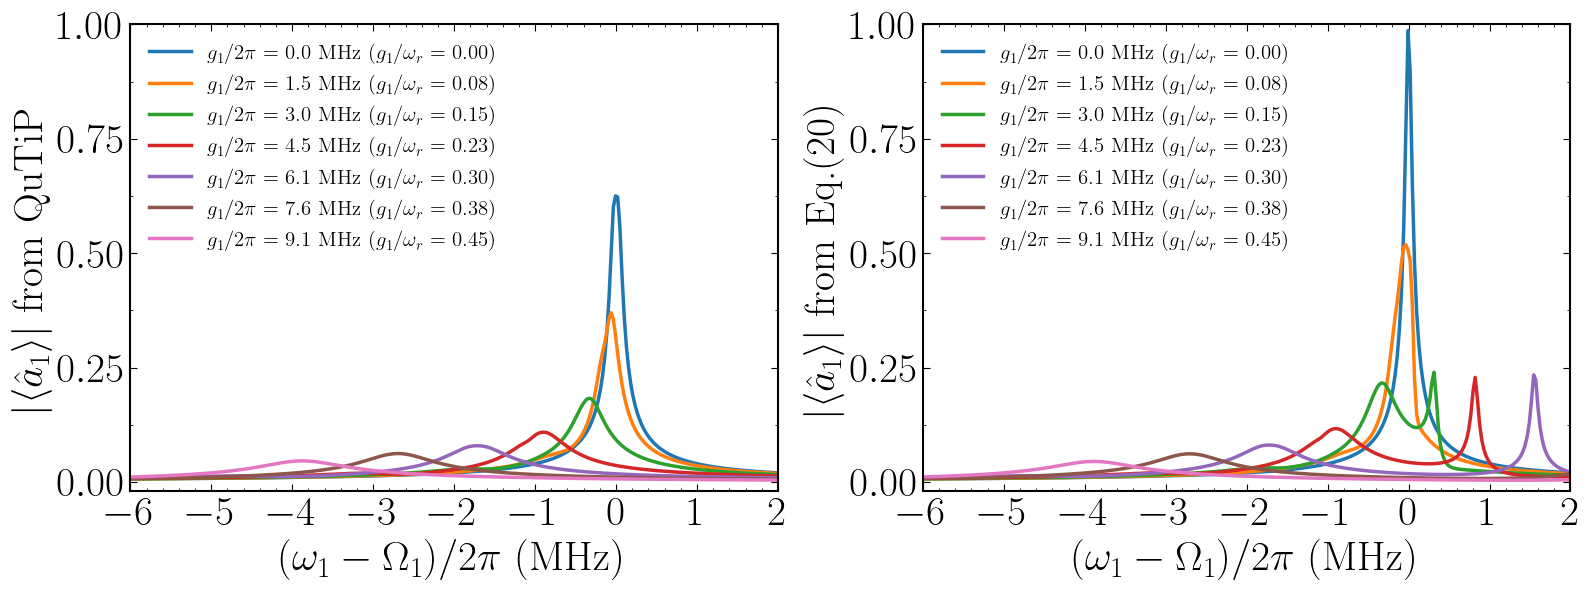

In [187]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in [0,10,20,30,40,50,60]:
    axes[0].plot(x_list, z_list_1[0][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', rotation=90, fontsize=fs)

axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[0].yaxis.set_ticks_position('both')
axes[0].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[0].set_xlim(-6,2)
axes[0].set_ylim(-0.02,1)

start, end = axes[0].get_xlim()
axes[0].xaxis.set_ticks(arange(start, end+1, 1))

axes[0].xaxis.set_ticks_position('both')
axes[0].yaxis.set_ticks_position('both')

axes[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].margins(x=0.1, y=0.1)
###############################
for i in [0,10,20,30,40,50,60]:
    axes[1].plot(x_list, z_list_1[1][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(-0.02,1)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################

plt.tight_layout()

if(saveResults == True):
    filename = "001"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')

plt.show()


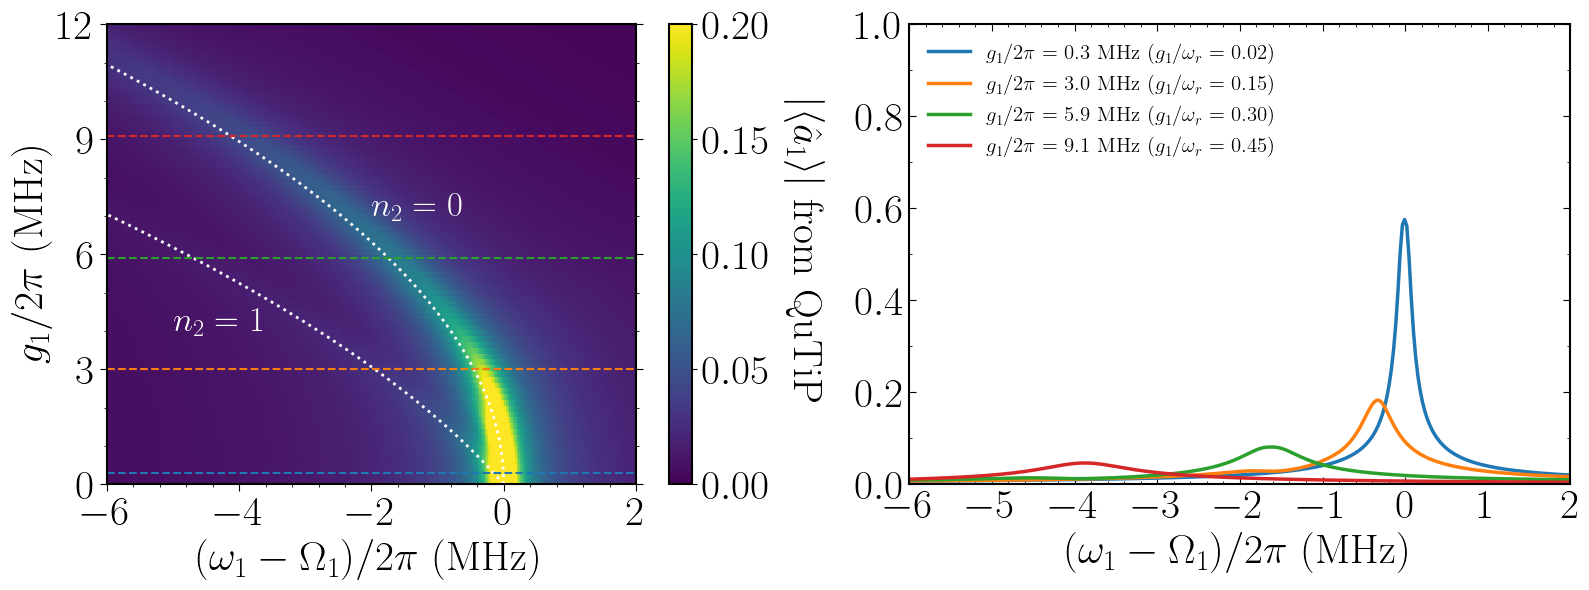

In [188]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.2)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_1[0], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', labelpad = 40, rotation=270, fontsize=fs)
###############################
for i in [2,20,39,60]:
    axes[1].plot(x_list, z_list_1[0][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "002"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


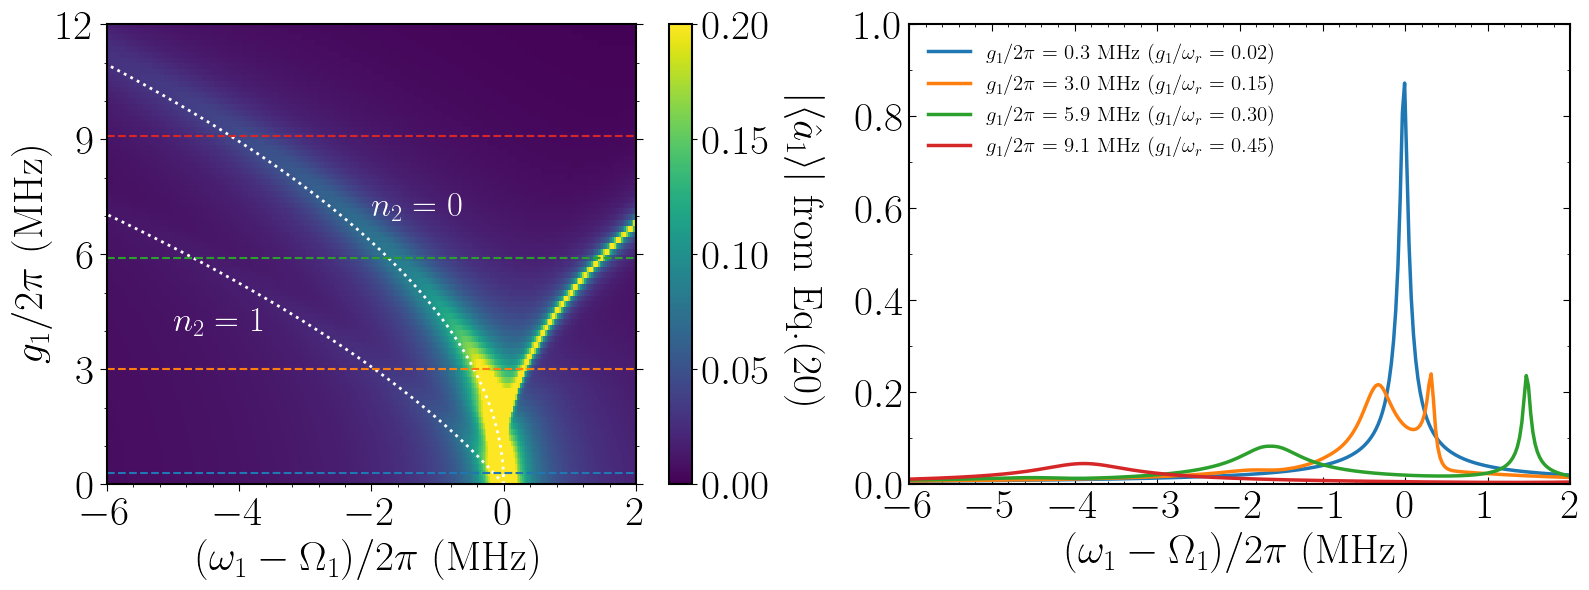

In [189]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.2)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_1[1], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, z_list_1[1][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "003"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [190]:
rerror_list = []

for i in range(len(z_list_1[0])):
    a1 = z_list_1[0][i]
    a2 = z_list_1[1][i]

    rerror = [(abs(k1 - k2)*100)/k1 for k1,k2 in zip(a1,a2)]

    rerror_list.append(rerror)

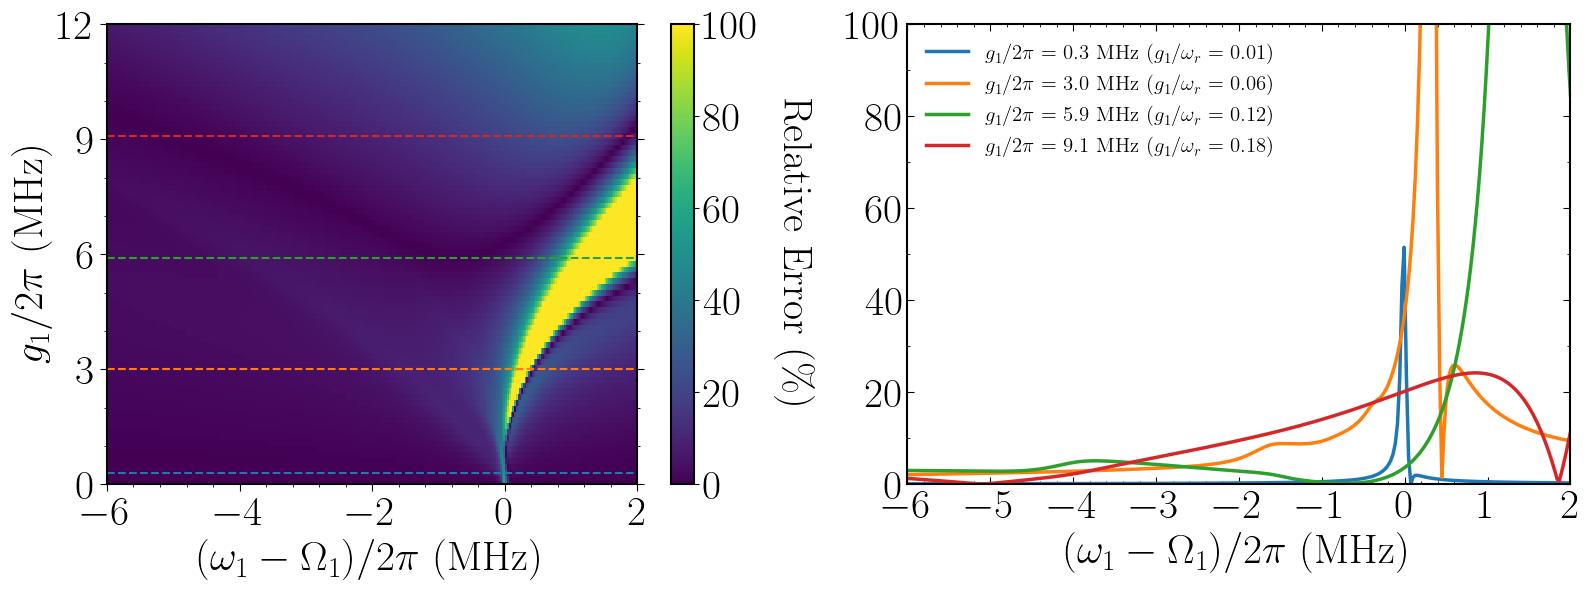

In [194]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 100)
im1 = axes[0].pcolormesh(x_list, y_list, rerror_list, cmap=cm.viridis, norm=nrm, shading='auto')
###############################

###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Relative Error (\%)', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, rerror_list[i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,100)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "005"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


### Simulation 2

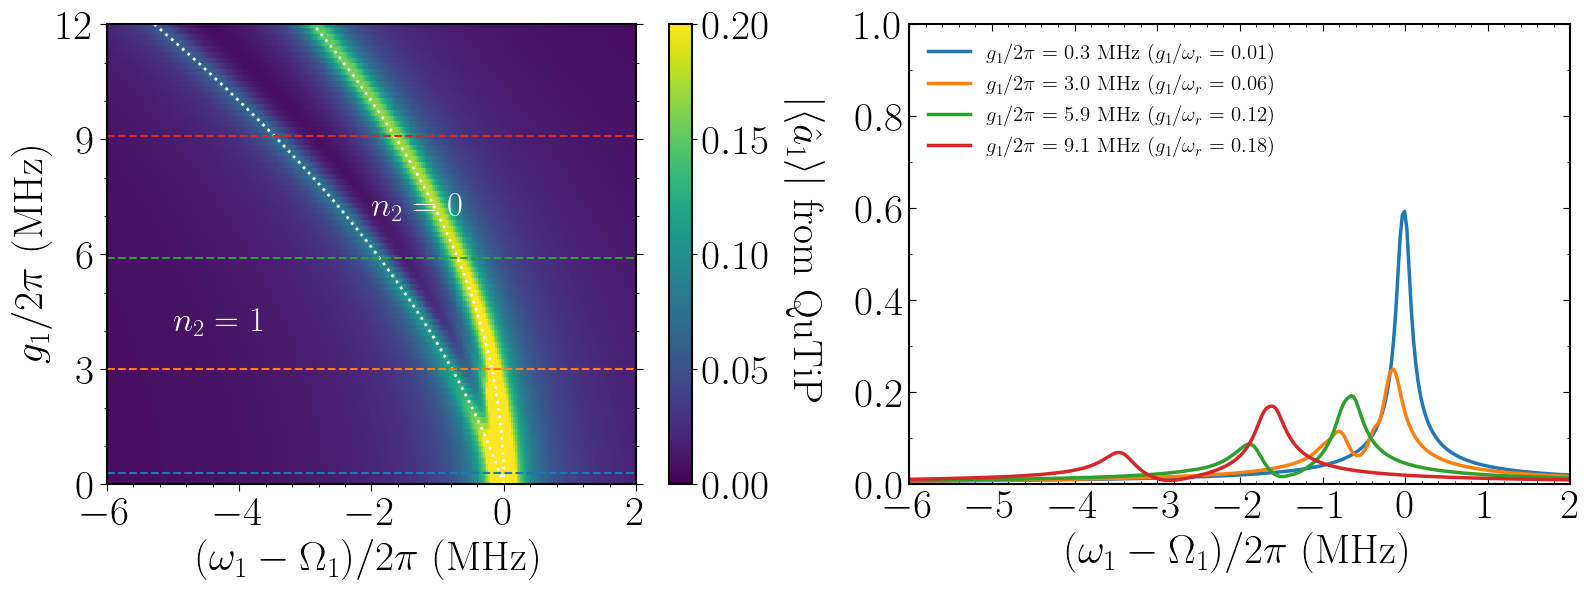

In [192]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.2)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_2[0], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, z_list_2[0][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "002"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


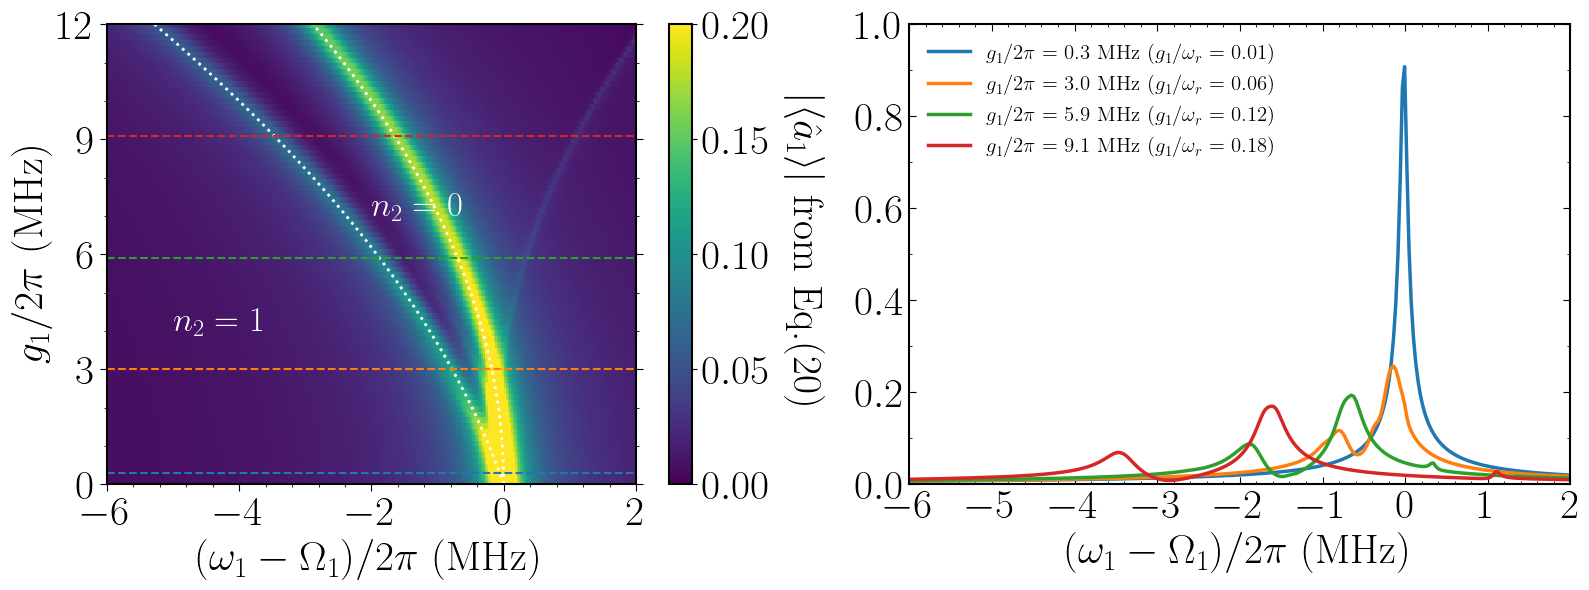

In [193]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.2)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_2[1], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, z_list_2[1][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "003"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [195]:
rerror_list = []

for i in range(len(z_list_2[0])):
    a1 = z_list_2[0][i]
    a2 = z_list_2[1][i]

    rerror = [(abs(k1 - k2)*100)/k1 for k1,k2 in zip(a1,a2)]

    rerror_list.append(rerror)

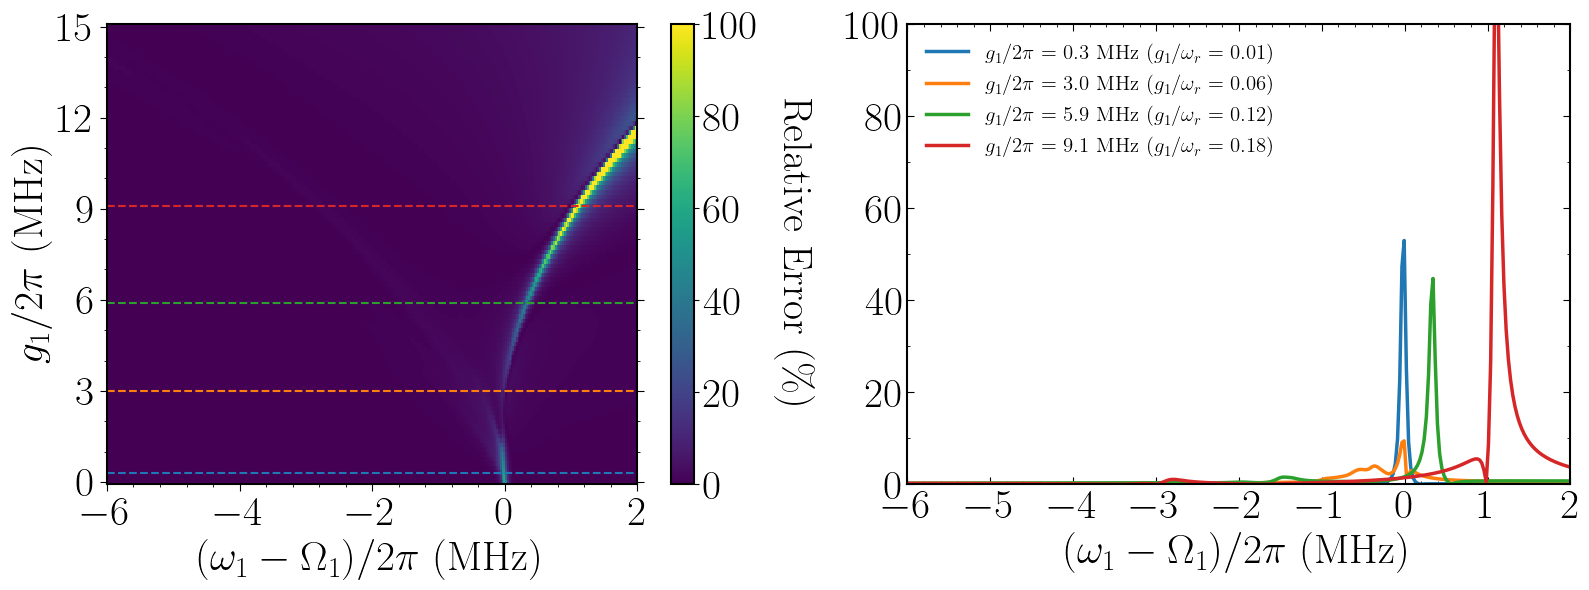

In [196]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 100)
im1 = axes[0].pcolormesh(x_list, y_list, rerror_list, cmap=cm.viridis, norm=nrm, shading='auto')
###############################

###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
#axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Relative Error (\%)', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, rerror_list[i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,100)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "005"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


### Simulation 3

In [197]:
x_list , y_list, z_list_3 = load("Results\Simulation_3\Results_[2023-08-24]_[21h07m].npy", allow_pickle=True)

name = "Simulation_3"

save_path_3 = "Results/" + name + "/"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

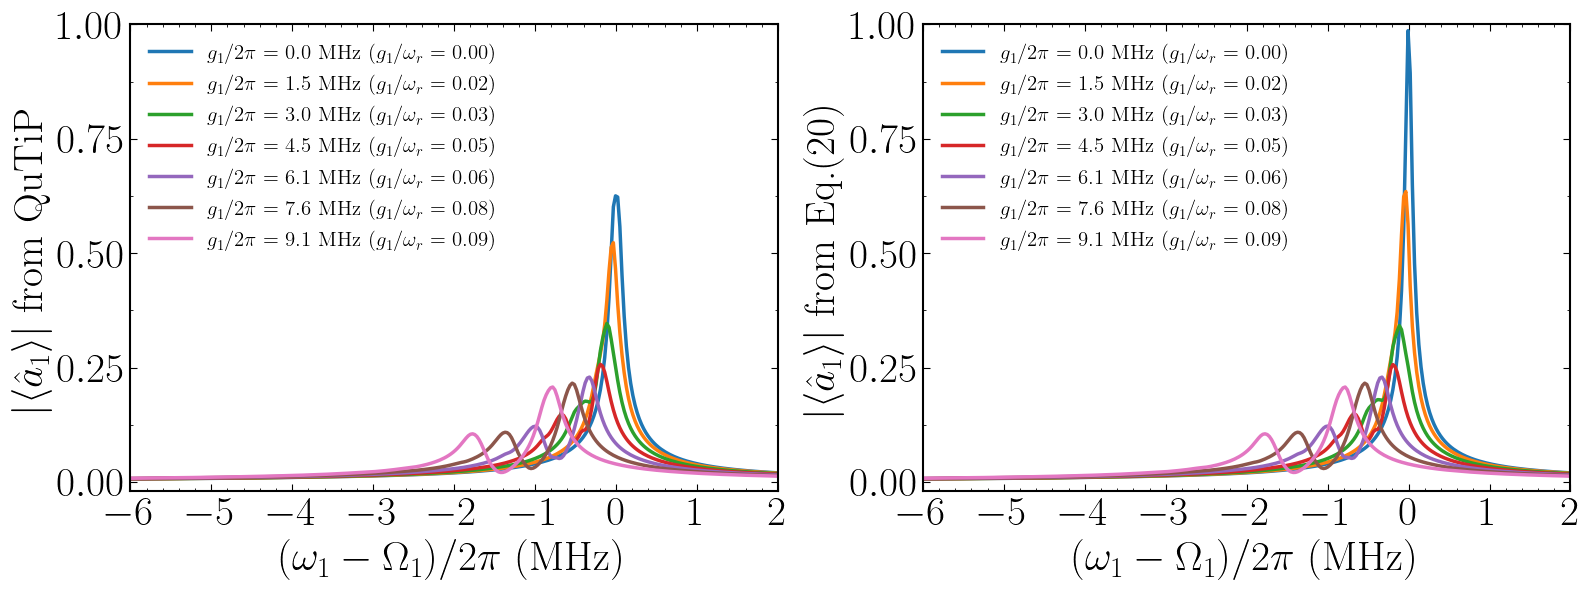

In [198]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 100  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in [0,10,20,30,40,50,60]:
    axes[0].plot(x_list, z_list_3[0][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', rotation=90, fontsize=fs)

axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[0].yaxis.set_ticks_position('both')
axes[0].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[0].set_xlim(-6,2)
axes[0].set_ylim(-0.02,1)

start, end = axes[0].get_xlim()
axes[0].xaxis.set_ticks(arange(start, end+1, 1))

axes[0].xaxis.set_ticks_position('both')
axes[0].yaxis.set_ticks_position('both')

axes[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].margins(x=0.1, y=0.1)
###############################
for i in [0,10,20,30,40,50,60]:
    axes[1].plot(x_list, z_list_3[1][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(-0.02,1)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################

plt.tight_layout()

if(saveResults == True):
    filename = "001"
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')

plt.show()


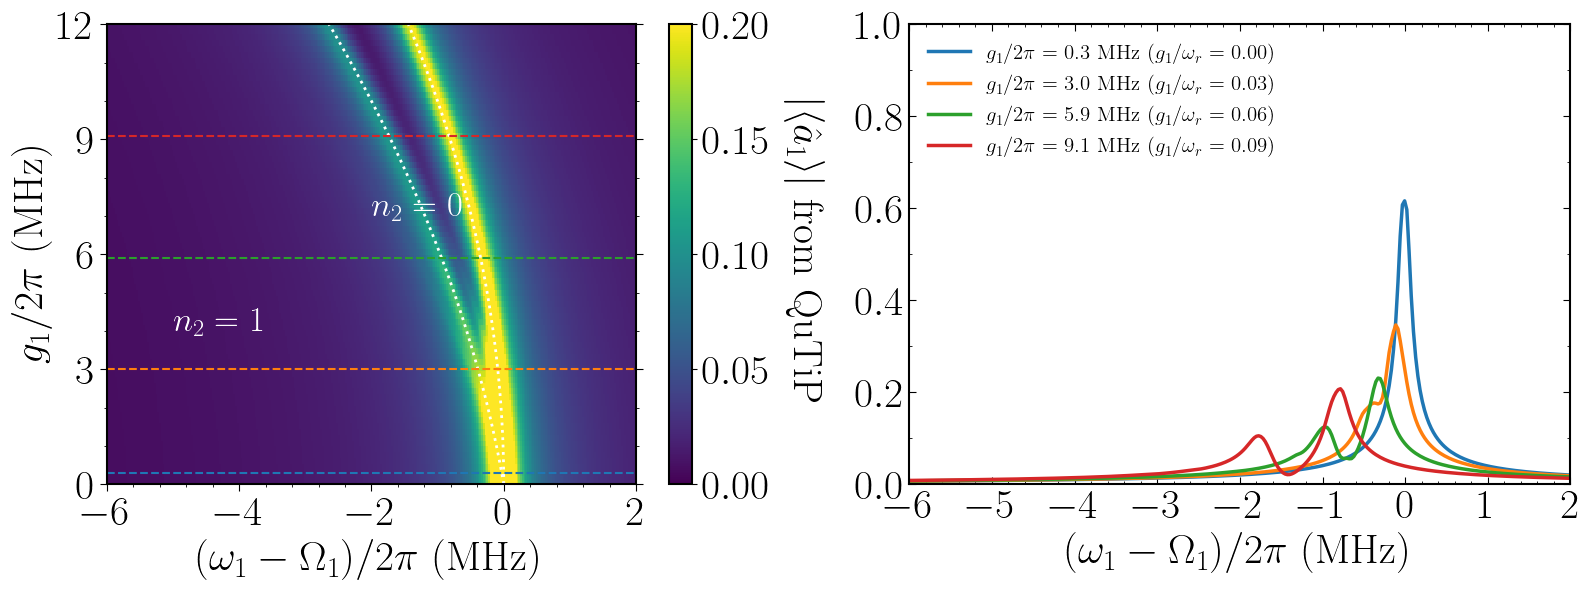

In [199]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 100  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.2)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_3[0], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, z_list_3[0][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "002"
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


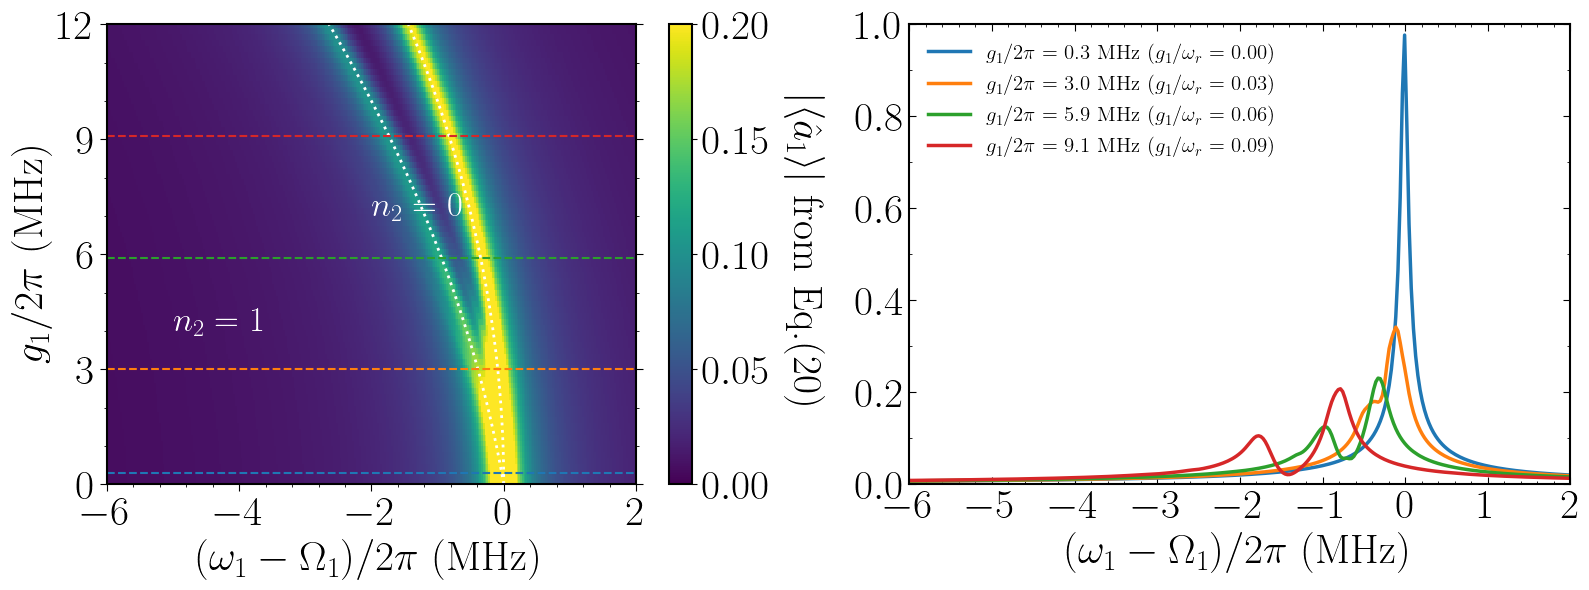

In [200]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 100  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.2)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_3[1], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, z_list_3[1][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "003"
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [201]:
rerror_list = []

for i in range(len(z_list_3[0])):
    a1 = z_list_3[0][i]
    a2 = z_list_3[1][i]

    rerror = [(abs(k1 - k2)*100)/k1 for k1,k2 in zip(a1,a2)]

    rerror_list.append(rerror)

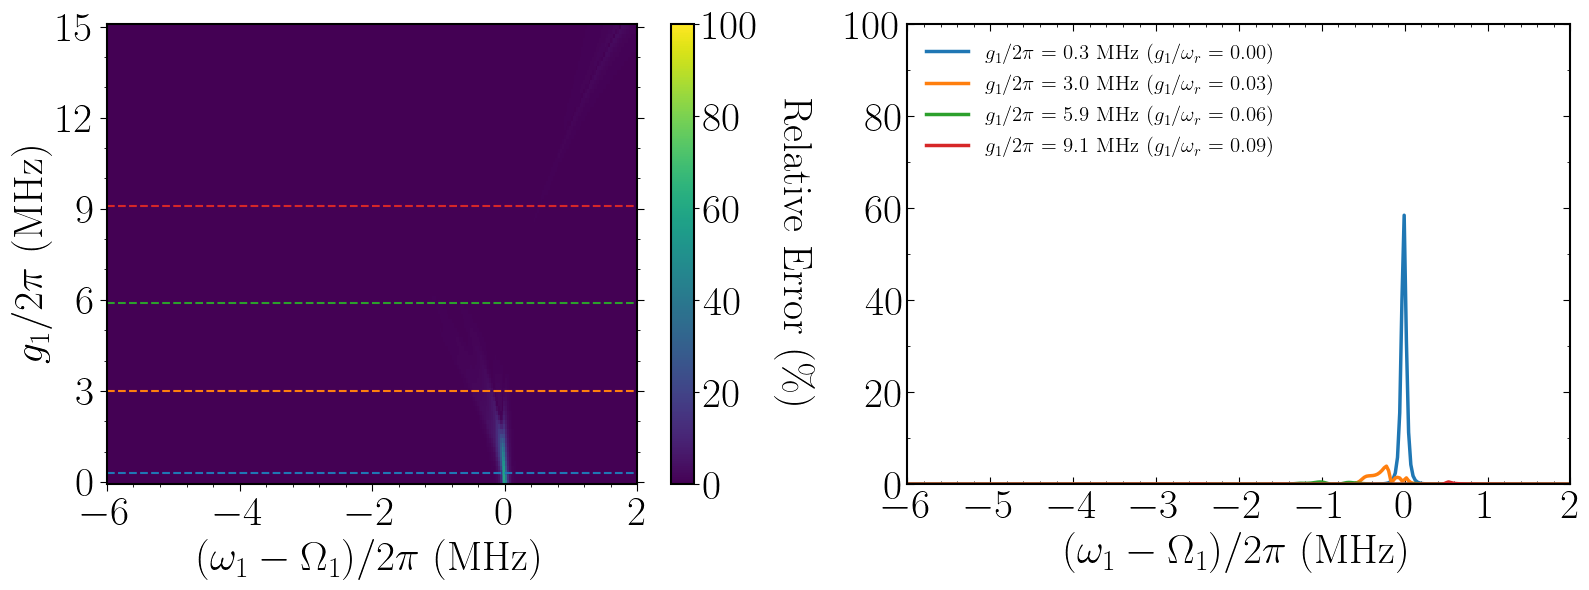

In [202]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 100  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 100)
im1 = axes[0].pcolormesh(x_list, y_list, rerror_list, cmap=cm.viridis, norm=nrm, shading='auto')
###############################

###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 5.9, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
#axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Relative Error (\%)', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [2,20,39,60]:
    axes[1].plot(x_list, rerror_list[i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0,100)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "005"
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 100  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm1 = mpl.colors.Normalize(-30, 30)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_3[10], cmap=cm.bwr, norm=nrm1, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[0].plot(shift_n0, y_list, ':', color='black', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='black', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='black', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='black', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 12.1, 2))
axes[0].yaxis.set_ticks_position('both')
###############################

###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Re$(X_1)/2\pi$ (kHz)', labelpad = 40, rotation=270, fontsize=fs)
###############################

nrm2 = mpl.colors.Normalize(-30, 30)
im2 = axes[1].pcolormesh(x_list, y_list, z_list_3[12], cmap=cm.bwr, norm=nrm2, shading='auto')
###############################
shift_n0 = [-(k**2)/(2*pi*wr*1e6) for k in galist]
shift_n1 = [(-(k**2)/(2*pi*wr*1e6))-((2*k*gb)/(2*pi*wr*1e6)) for k in galist]
axes[1].plot(shift_n0, y_list, ':', color='black', lw=2)
axes[1].plot(shift_n1, y_list, ':', color='black', lw=2)
axes[1].text(-5, 4, r"$n_2 = 1$", color='black', fontsize=25)
axes[1].text(-2, 7, r"$n_2 = 0$", color='black', fontsize=25)
###############################
axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', labelsize=ls)
axes[1].yaxis.set_ticks(arange(0, 12.1, 2))
axes[1].yaxis.set_ticks_position('both')
###############################

###############################
axes[1].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(5))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].set_xlim(-6, 2)
axes[1].set_ylim(0, 12)

cbar = plt.colorbar(im2, ax=axes[1])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Im$(X_1)/2\pi$ (kHz)', labelpad = 40, rotation=270, fontsize=fs)

###############################
plt.tight_layout()

if(saveResults == True):
    filename = "006"
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_3 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


### Simulation 4